In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
#pkg = mp.jupyter.open_package()
pkg = mp.jupyter.open_source_package()
pkg

# San Diego Police Regions and Demographics
`sandiego.gov-police_regions-2.1.1` Last Update: 2021-02-25T18:10:53

_Boundary shapes for San Diego neighborhoods, beats and divisions, with ACS 2019 estimates for populations, by race._


This package links shapefiles for San Diego police beats to Census tracts and
merges in ACS estimates for population, by race, from the 2016 5 year ACS. When
a police beat boundry crosses a tract, the tract population is allocated to
beats by the proportion of the overlap by area. See the [Jupyter
notebook](https://github.com/metatab-packages/metatab-packages/blob/master/sandi
ego.gov/sandiego.gov-police_regions/notebooks/BeatPopulations.ipynb) that
performs the procedure for details.

For the race/ethicty statistics, Hispanic ('hisp') refers to Hispanics of any
race, while all other races refer to non-Hispanics of that race.
## Documentation Links

* [Police Divisions Repository Page](https://data.sandiego.gov/datasets/pd-divisions/) Data repository page that links to original files.

 
## Notes

* Version 2.1.1 Updates to 2019 Census, better EPSG ( UTM 11N ) for area calc
## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [pd_beats](notebooks/beats.ipynb#pd_beats)**. Police beats
* ** [pd_divisions](notebooks/beats.ipynb#pd_divisions)**. Police Divisions
* ** [pd_neighborhoods](notebooks/beats.ipynb#pd_neighborhoods)**. Police Neighborhoods
* ** [beat_demographics](notebooks/BeatPopulations.ipynb#beat_demographics)**. Counts of people in the beat, by race.

## References
<ul><li> <strong>tracts</string>, <em>censusgeo://2019/5/CA/tract</em>. Census tracts from 2016 5 year ACS, for San Diego county</li><li> <strong>race</string>, <em>census://2019/5/CA/tract/B03002</em>. Race, by tract, in San Diego county</li><li> <strong>pd_beats_source</string>, <em>shape+http://seshat.datasd.org/sde/pd/pd_beats_datasd.zip</em>. Police beats</li><li> <strong>pd_divisions_source</string>, <em>shape+http://seshat.datasd.org/sde/pd/pd_divisions_datasd.zip</em>. Police Divisions</li><li> <strong>pd_neighborhoods_source</string>, <em>shape+http://seshat.datasd.org/sde/pd/pd_divisions_datasd.zip</em>. Police Neighborhoods</li><ul>

In [3]:
# Either there are errors in the source files, or there is a bug in Geopandas, but these
# files need to be simplified slightly to load. Otherwize I get "Null geometry supports no operations" and
# "Shell is not a LinearRing" errors

In [4]:
simpl_dist = 10

pd_beats = pkg.reference('pd_beats_source').geoframe()
pd_beats['geometry'] = pd_beats.to_crs(32611).simplify(simpl_dist).to_crs(4326)

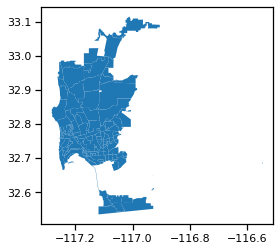

In [5]:
pd_beats.plot()

In [11]:
pd_beats.head()

,objectid,beat,div,serv,name,geometry
0,3,935,9,930,NORTH CITY,"MULTIPOLYGON (((-117.20425 32.96202, -117.2043..."
1,7,0,0,0,SAN DIEGO,"MULTIPOLYGON (((-117.22526 32.70267, -117.2264..."
2,8,511,5,510,None,"MULTIPOLYGON (((-117.22529 32.70261, -117.2246..."
3,9,722,7,720,NESTOR,"POLYGON ((-117.09042 32.58383, -117.08714 32.5..."
4,10,314,3,310,BIRDLAND,"POLYGON ((-117.15149 32.80650, -117.14943 32.7..."


In [6]:
pd_divisions = pkg.reference('pd_divisions_source').geoframe()
pd_divisions['geometry'] = pd_divisions.to_crs(32611).simplify(simpl_dist).to_crs(4326)


In [7]:
pd_neighborhoods = pkg.reference('pd_neighborhoods_source').geoframe()
pd_neighborhoods['geometry'] = pd_neighborhoods.to_crs(32611).simplify(simpl_dist).to_crs(4326)

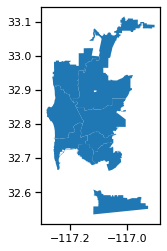

In [9]:
pd_neighborhoods.plot()